<a href="https://colab.research.google.com/github/RaulCarrion95/Data-Science/blob/main/Economia_Argentina_en_los_ultimos_20_a%C3%B1os.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_excel('/content/drive/MyDrive/Data science/Economia Argentina en los ultimos 20 años.xlsx')

In [ ]:
df.head()

,Fecha,Circulacion monetaria,Depositos de EF en CC,Plazos fijos,Depositos en CA,Depositos en cuenta corriente,Tasa de inflacion
0,2000-01-01,1.458860e+07,0,50975109,13792901.0,10150444,0.8
1,2000-02-01,1.398887e+07,0,51759508,13718672.0,9753288,0.0
2,2000-03-01,1.364194e+07,0,51829286,13888970.0,9980836,-0.5
3,2000-04-01,1.390456e+07,0,52277142,13616720.0,9569138,-0.1
4,2000-05-01,1.352988e+07,0,53063658,13484312.0,10687922,-0.4


Comenzamos con graficos usando matplotlib

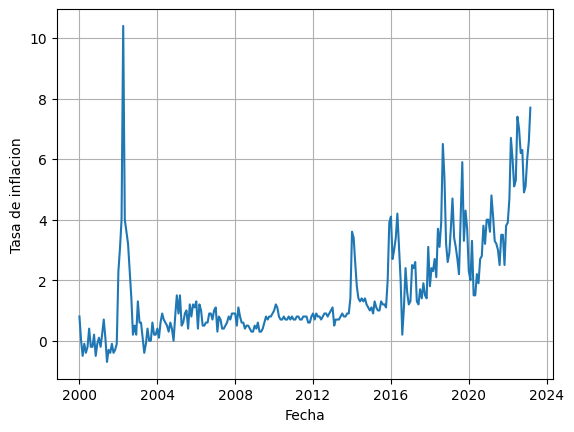

In [ ]:
fig, ax= plt.subplots()
ax.plot(df['Fecha'], df['Tasa de inflacion'])
ax.set_xlabel('Fecha')
ax.set_ylabel('Tasa de inflacion')
plt.grid()

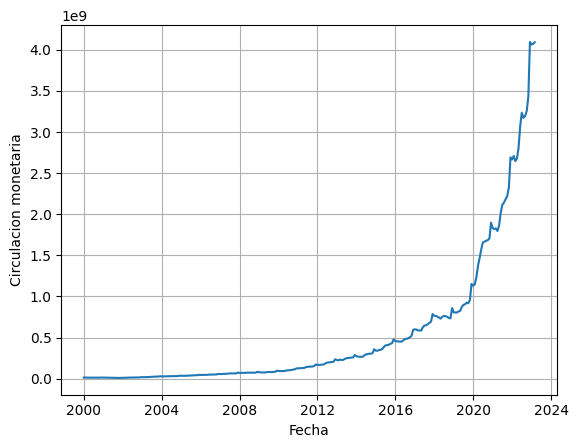

In [ ]:
fig, ax= plt.subplots()
ax.plot(df['Fecha'], df['Circulacion monetaria'])
ax.set_xlabel('Fecha')
ax.set_ylabel('Circulacion monetaria')
plt.grid()

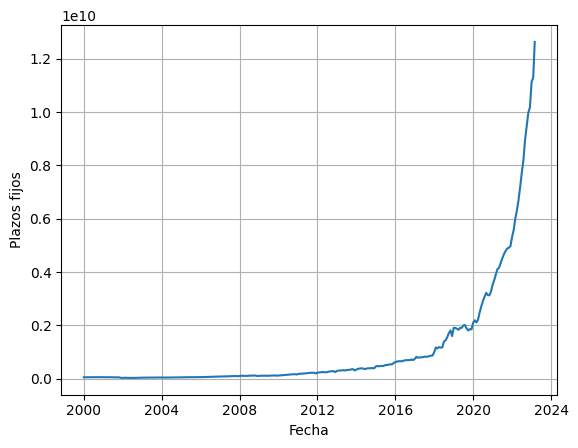

In [ ]:
fig, ax= plt.subplots()
ax.plot(df['Fecha'], df['Plazos fijos'])
ax.set_xlabel('Fecha')
ax.set_ylabel('Plazos fijos')
plt.grid()

Ahora graficamos usando seaborn

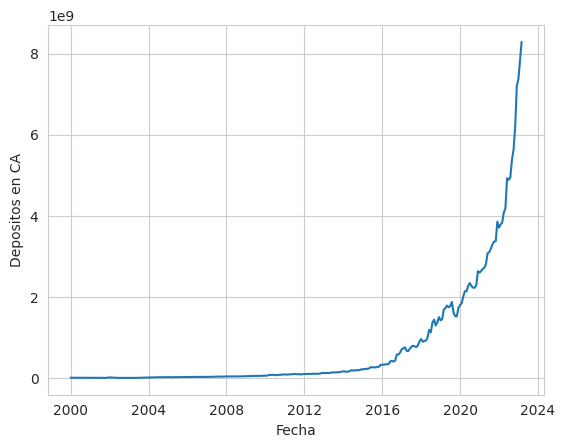

In [ ]:
sns.lineplot(x= 'Fecha', y= 'Depositos en CA', data= df)
sns.set_style("whitegrid")

<Axes: xlabel='Circulacion monetaria', ylabel='Plazos fijos'>

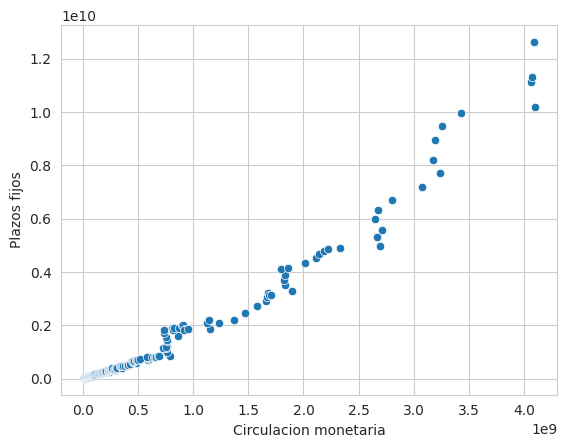

In [ ]:
sns.scatterplot(x= 'Circulacion monetaria', y= 'Plazos fijos', data= df)

<Axes: xlabel='Circulacion monetaria', ylabel='Tasa de inflacion'>

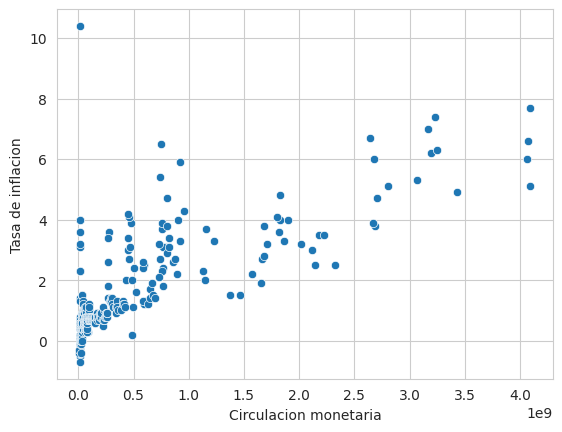

In [ ]:
sns.scatterplot(x= 'Circulacion monetaria', y= 'Tasa de inflacion', data= df)

ESTRUCTURANDO UN PROYECTO DE DATA SCIENCE PARTE 1

Creamos una nueva columna que se va a llamar Base monetaria. La misma es la suma de la circulacion monetaria y los depositos de entidades financieras en cuentas corrientes.

In [ ]:
df['Base monetaria']= df['Circulacion monetaria'] + df['Depositos de EF en CC']

In [ ]:
df.head()

,Fecha,Circulacion monetaria,Depositos de EF en CC,Plazos fijos,Depositos en CA,Depositos en cuenta corriente,Tasa de inflacion,Base monetaria
0,2000-01-01,1.458860e+07,0,50975109,13792901.0,10150444,0.8,1.458860e+07
1,2000-02-01,1.398887e+07,0,51759508,13718672.0,9753288,0.0,1.398887e+07
2,2000-03-01,1.364194e+07,0,51829286,13888970.0,9980836,-0.5,1.364194e+07
3,2000-04-01,1.390456e+07,0,52277142,13616720.0,9569138,-0.1,1.390456e+07
4,2000-05-01,1.352988e+07,0,53063658,13484312.0,10687922,-0.4,1.352988e+07


PREGUNTA 1: ¿Que relacion existe entre la base monetaria y la inflacion?

<Axes: xlabel='Base monetaria', ylabel='Tasa de inflacion'>

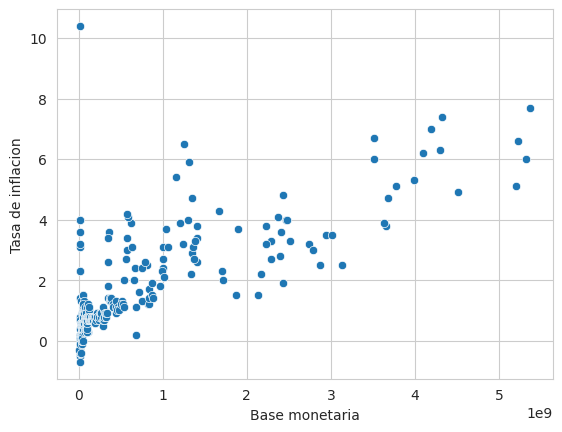

In [ ]:
sns.scatterplot(x= 'Base monetaria', y= 'Tasa de inflacion', data= df)

RESPUESTA: Podemos ver que la relacion entre la tasa de inflacion y la base monetaria es casi igual a la que tiene con la circulacion monetaria. Dado esto, podemos decir que agregar los depositos en cuenta corriente de las entidades financieras, casi que no modifica la relacion con la inflacion.

PREGUNTA 2: ¿Como se relacionan los depositos en plazos fijos con la tasa de inflacion?

<Axes: xlabel='Plazos fijos', ylabel='Tasa de inflacion'>

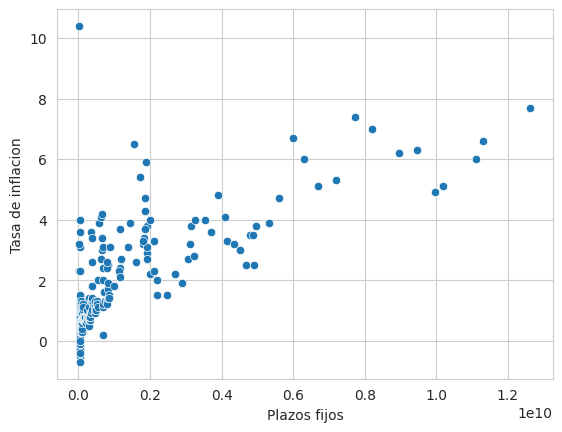

In [ ]:
sns.scatterplot(x= 'Plazos fijos', y= 'Tasa de inflacion', data= df)

RESPUESTA: Podemos ver que presentan una relacion similar a la que habiamos visto entre circulacion monetaria y la tasa de inflacion, por lo que, podriamos suponer que, a medida que la tasa de inflacion es mayor, aumentan los depositos en plazos fijos. Esto puede deberse a que, dado el aumento de los precios, las personas quieren evitar que su dinero pierda valor, colocandolo en estos instrumentos.

ESTRUCTURANDO UN PROYECTO DE DATA SCIENCE PARTE 2

Vamos a suponer que el gobierno nacional intenta analizar las relaciones entre las variables antes vistas y la inflacion, para de alguna manera poder elaborar una politica para mejorar la situacion general del pais.

Anteriormente, hemos graficado distintas relaciones entre las variables en cuestion y la evolucion de las mismas a lo largo de los ultimos 20 años.

Podemos ver que varias de estas han crecido exponencialmente en este periodo de tiempo, motivo por el cual, podriamos decir que son la causa de una inflacion creciente.

Dicho esto, plantearemos la siguiente hipotesis: el causante principal de la inflacion es el crecimiento de la base monetaria, para los niveles de produccion agregada de la economia.

Si partimos de la ecuacion de la teoria cuantitativa del dinero, tenemos que:

M x V = P x Y

siendo:

M= base monetaria en terminos nominales

V= velocidad del dinero

P= nivel de precios

Y= nivel de produccion

Si observamos como evolucino el PBI en el periodo de tiempo analizado, podemos ver que la tendencia del mismo es practicamente horizontal.
Por otro lado, si analizamos los graficos anteriores, podemos ver que los depositos en plazos fijos, el circulante monetario, los depositos en cajas de ahorro y cuentas corrientes, crecen exponencialmente y de una manera muy similar.
Si tenemos en cuenta que todas estas variables, constituyen los fondos que los individuos poseen para su consumo y que, ademas, los plazos fijos rinden intereses, lo cual implica que estos fondos crezcan en el tiempo.


A continuacion, veremos la evolucion del PBI, segun la base de datos del Banco Mundual:

In [ ]:
PBI= pd.read_excel('/content/drive/MyDrive/Data science/PBI historico de Argentina.xlsx')

In [ ]:
PBI.head()

,AÑO,PBI
0,1961,0.054278
1,1962,-0.008520
2,1963,-0.053082
3,1964,0.101303
4,1965,0.105694


In [ ]:
PBI['PBI_porcentual']= PBI['PBI'] * 100

In [ ]:
PBI.head()

,AÑO,PBI,PBI_porcentual
0,1961,0.054278,5.427843
1,1962,-0.008520,-0.852022
2,1963,-0.053082,-5.308197
3,1964,0.101303,10.130298
4,1965,0.105694,10.569433


Text(0, 0.5, 'PBI_porcentual')

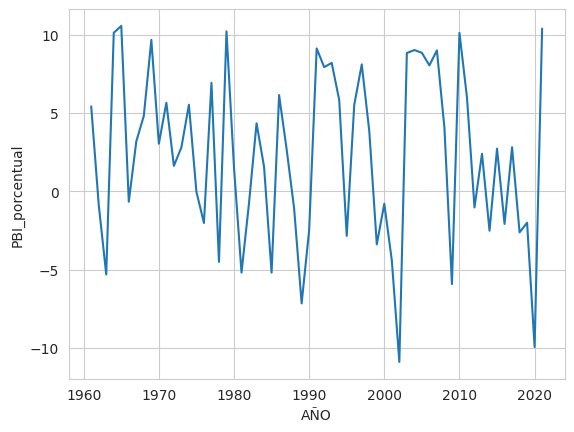

In [ ]:
fig, ax= plt.subplots()
ax.plot(PBI['AÑO'], PBI['PBI_porcentual'])
ax.set_xlabel('AÑO')
ax.set_ylabel('PBI_porcentual')

En este grafico, podemos ver que el PBI, si bien, presenta maximos y minimos, su tendencia es horizontal.
Por lo que si volvemos a la ecuacion de la teoria cuantitativa del dinero:

M x V = P x Y

Si suponemos que V= velocidad del dinero es igual a 1, y reagrupamos, tenemos:

M/P = Y

Por lo que, si Y se mantiene "contante" y aumenta la base monetaria exponencialmente (M), tendremos que el nivel de precios (P) o inflacion, evoluciona en la misma proporcion que M.

Ahora bien, si comparamos la evolucion a lo largo del tiempo de la inflacion, el PBI y la base monetaria, tenemos:

Text(0, 0.5, 'Tasa de inflacion')

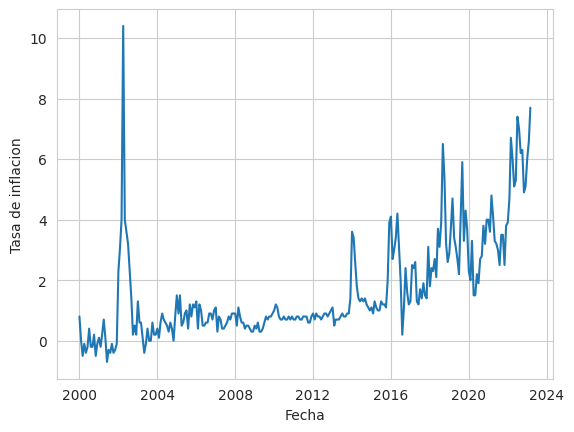

In [ ]:
fig, ax= plt.subplots()
ax.plot(df['Fecha'], df['Tasa de inflacion'])
ax.set_xlabel('Fecha')
ax.set_ylabel('Tasa de inflacion')

Text(0, 0.5, 'Base monetaria')

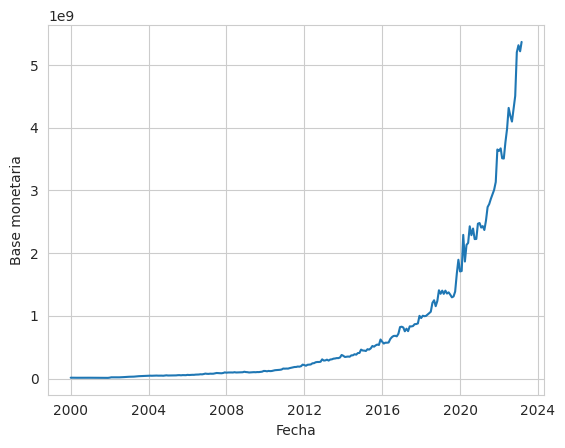

In [ ]:
fig, ax= plt.subplots()
ax.plot(df['Fecha'], df['Base monetaria'])
ax.set_xlabel('Fecha')
ax.set_ylabel('Base monetaria')

Podemos ver que existe una relacion clara entre la inflacion, base monetaria y PBI.
Sin embargo, tambien situaciones como en el 2001-2002 en donde la base monetaria es bastante mas baja que en los ultimos años pero con un maximo absoluto de inflacion y un minimo absoluto en terminos de PBI.
Podriamos suponer que dado un nivel de base monetaria, si cae el PBI aumentan los precios (basandonos en ecuacion de la teoria cuantitativa del dinero), pero deberiamos ser mas detallistas y recopilar mas informacion para verificarlo.

Otro escenario posible podria ser:

Comencemos por definir que la velocidad del dinero, es el numero de veces que el dinero de la economia da vueltas a la misma en su propio funcionamiento.
Si pasamos a suponer que esta es superior a 1, dado el estres de la economia, en donde las personas intentan gastar o invertir ese dinero (con mas apuro) para no devaluarse dejandolo "parado", podemos ver con la ecuacion antes presentada M/P = Y/V, que los precios (P) crecerian en menos proporcion que la base monetaria (M), ya que parte de este aumento es absorvido por un incremento en la velocidad del dinero (V).

Con esto podriamos concluir que, a pesar de la relacion clara que existe entre estas variables, existen otros factores y variables, que no consideramos en este analisis, pero que influyen en la tasa de inflacion. Como podria ser el caso de una velocidad del dinero (V) superior a 1.

